In [1]:
# import matplotlib.font_manager as font_manager
# font_dir = ['/dir/with/fonts/Arial']
# for font in font_manager.findSystemFonts(font_dir):
#     font_manager.fontManager.addfont(font)

# mpl.rcParams['font.family'] = 'Helvetica'

# from matplotlib import rc
# rc('font',**{'family':'sans-serif','sans-serif':['PT Sans']})
# rc('font',**{'family':'sans-serif'})

In [2]:
# import matplotlib.font_manager
# from IPython.core.display import HTML

# def make_html(fontname):
#     return "<p>{font}: <span style='font-family:{font}; font-size: 24px;'>{font}</p>".format(font=fontname)

# code = "\n".join([make_html(font) for font in sorted(set([f.name for f in matplotlib.font_manager.fontManager.ttflist]))])

# HTML("<div style='column-count: 2;'>{}</div>".format(code))

In [3]:
# Standard Python modules
import os, sys
%matplotlib inline

# import personal modules
sys.path.append('../')
from ar_landfall_tool_contour import landfall_tool_contour
from ar_landfall_tool_vector import landfall_tool_vector
from ar_landfall_tool_IVT_mag import landfall_tool_IVT_magnitude
from cw3e_tools import load_datasets




# pd.options.display.float_format = "{:,.2f}".format # makes it so pandas tables display only first two decimals

In [4]:
model='W-WRF'

if (model == 'ECMWF') | (model == 'GEFS'):
    loc_lst = ['US-west']*3 + ['SAK']*3 + ['AK']*2
    ori_lst = ['latitude']*3 + ['longitude']*3 + ['latitude']*2
    ptloc_lst = ['coast', 'foothills', 'inland']*2 + ['coast', 'inland']

elif (model == 'ECMWF-GEFS') | (model == 'W-WRF'):
    loc_lst = ['US-west']*3 
    ori_lst = ['latitude']*3 
    ptloc_lst = ['coast', 'foothills', 'inland']

threshold_lst = [150, 250, 500, 750]

# for each model and point location, load the data, then calculate each metric
for i, (loc, ori, ptloc) in enumerate(zip(loc_lst, ori_lst, ptloc_lst)):
    print(loc, ori, ptloc)

US-west latitude coast
US-west latitude foothills
US-west latitude inland


In [5]:
%%time

model = 'ECMWF'
loc = 'US-west'
ptloc = 'coast'
fname='/data/downloaded/SCRATCH/cw3eit_scratch/ECMWF/archive/IVT_EC_2023111212.nc'
ori = 'latitude'

if model == 'ECMWF-GEFS':   
    s = load_datasets('ECMWF', loc, ptloc)
    ds_pt_ECMWF, ds_ECMWF = s.calc_ivt_vars()
    model_init_date = ds_pt_ECMWF.model_init_date
    date_string = model_init_date.strftime('%Y%m%d%H')
    path_to_data = '/data/downloaded/SCRATCH/cw3eit_scratch/'
    fname = path_to_data + 'GEFS/FullFiles/IVT_Full_{0}.nc'.format(date_string)
    
    s = load_datasets('GEFS', loc, ptloc)
    ds_pt_GEFS, ds_GEFS = s.calc_ivt_vars()
    
    ## subtract ECMWF - GEFS
    ds_pt = ds_pt_ECMWF-ds_pt_GEFS
    ds = ds_ECMWF-ds_GEFS
    
    ## Add attribute information
    ds_pt = ds_pt.assign_attrs(model_init_date=model_init_date)
    
else:
    s = load_datasets(model, loc, ptloc, fname)
    ds_pt, ds = s.calc_ivt_vars()

# if model == 'ECMWF' or model == 'GEFS':
    # prec = s.load_prec_QPF_dataset()

CPU times: user 50.4 s, sys: 1min 32s, total: 2min 22s
Wall time: 2min 25s


In [6]:
%%time
s = landfall_tool_contour(ds_pt=ds_pt, loc=loc, ptloc=ptloc, forecast=model, threshold=150, orientation=ori, path_to_out='figs/')
s.create_figure()

CPU times: user 13.8 s, sys: 8.69 s, total: 22.5 s
Wall time: 36.2 s


In [8]:
%%time
s = landfall_tool_IVT_magnitude(ds_pt=ds_pt, loc=loc, ptloc=ptloc, forecast=model, mag_type='control', orientation=ori, path_to_out='figs/')
s.create_figure()

CPU times: user 14.3 s, sys: 10.6 s, total: 25 s
Wall time: 23.8 s


KeyboardInterrupt: 

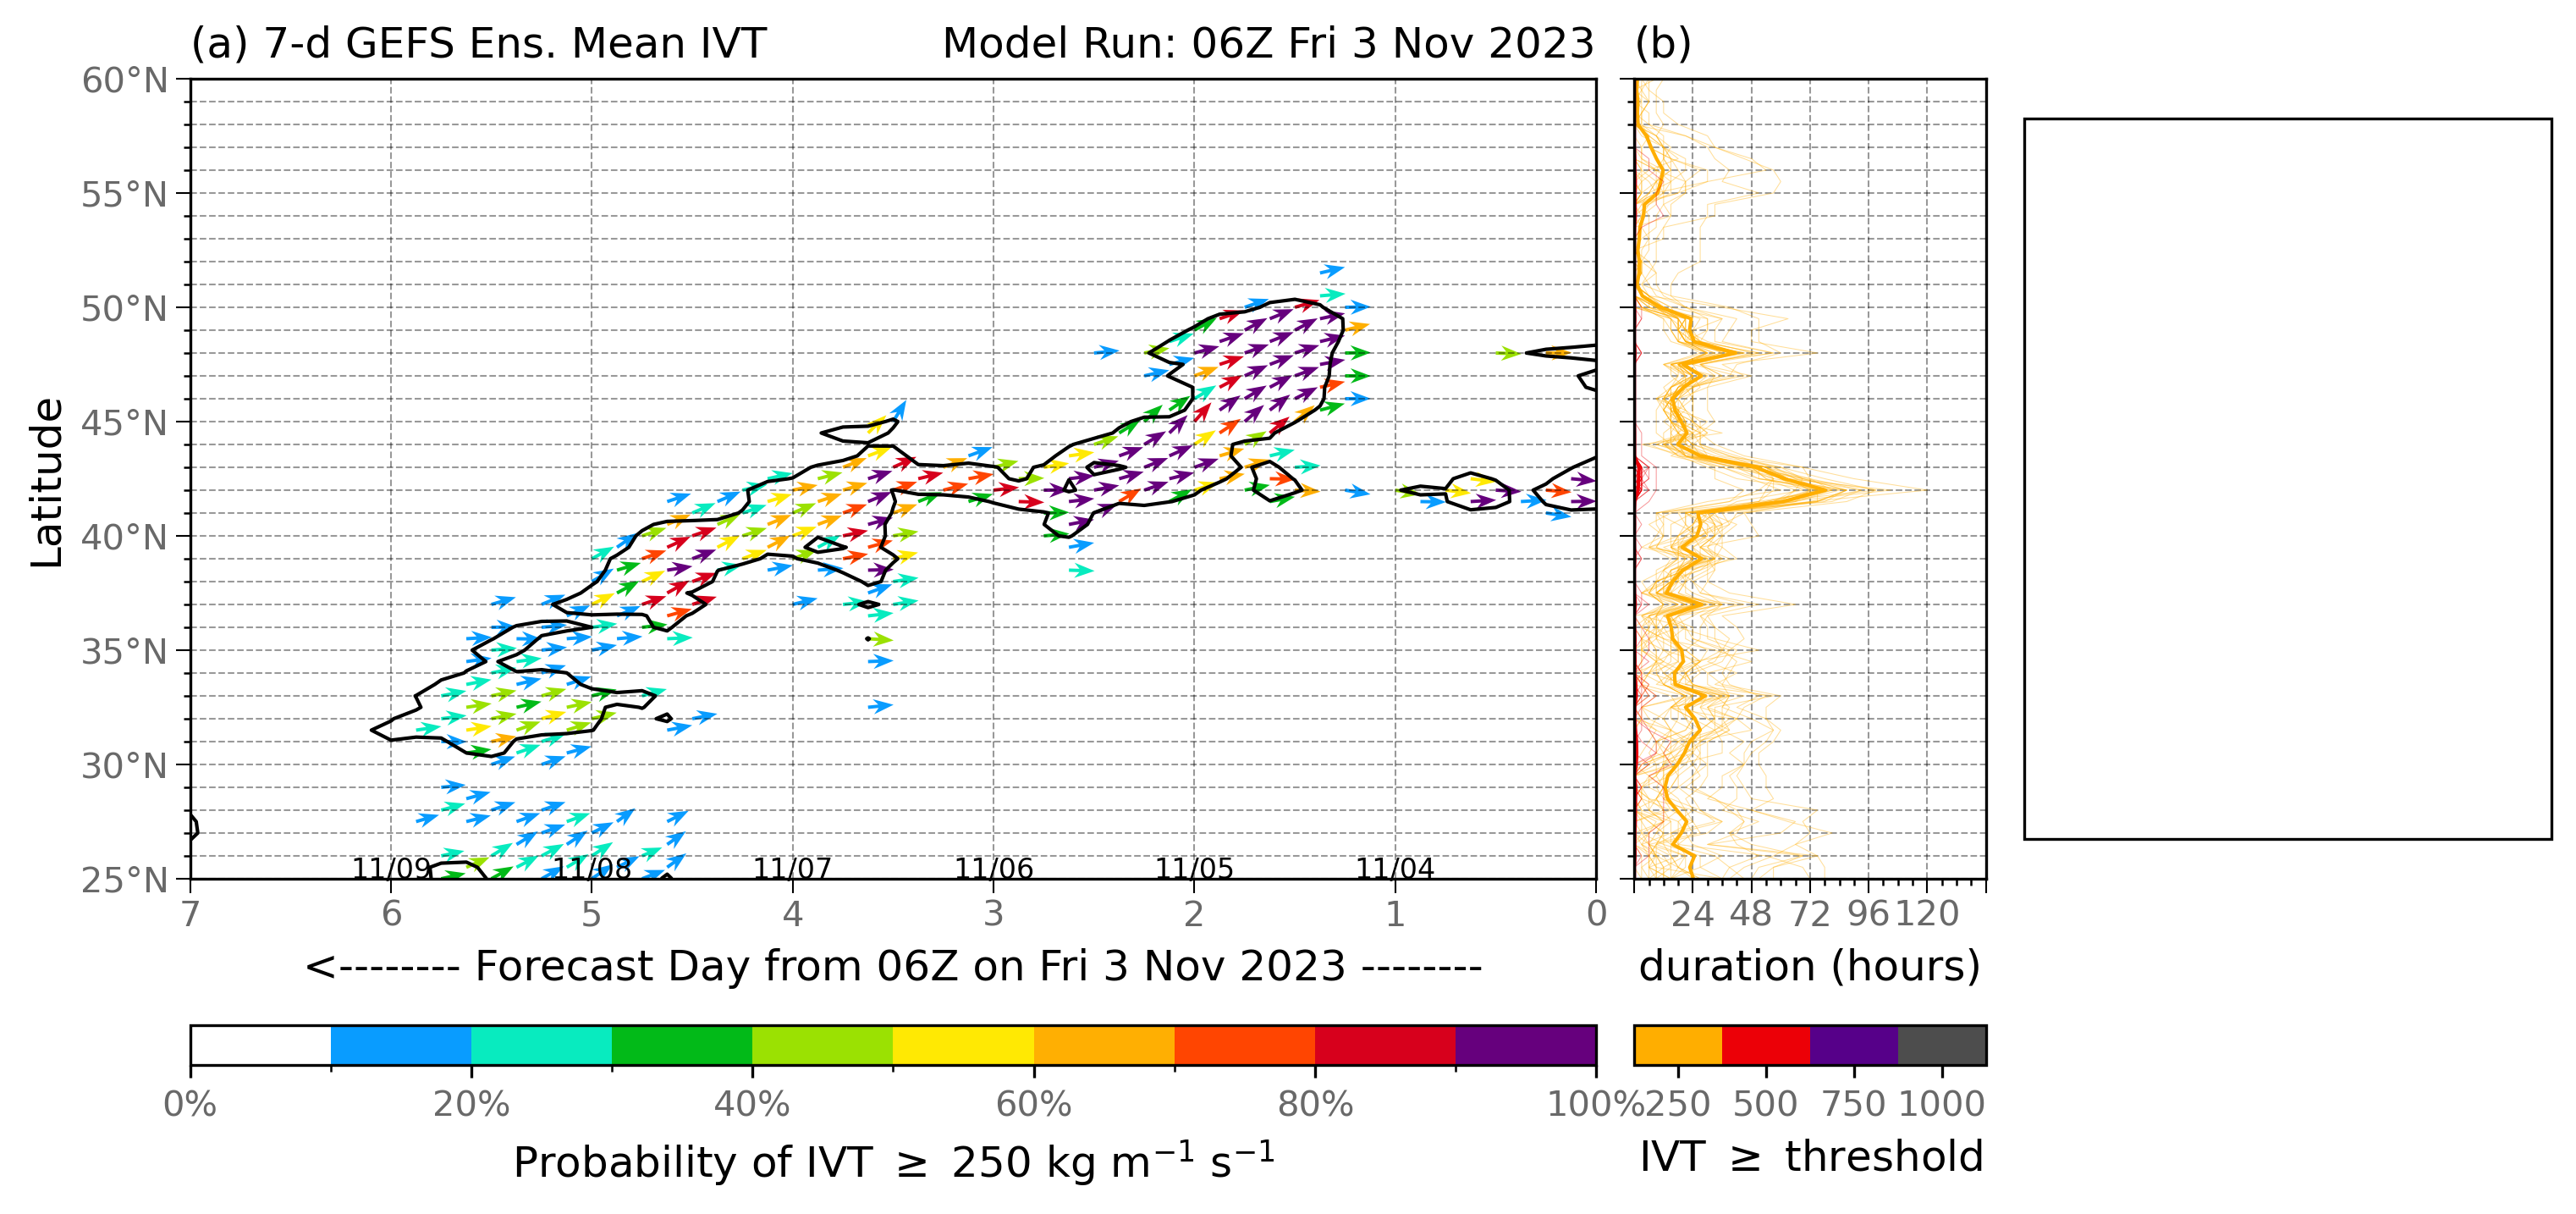

In [7]:
%%time
s = landfall_tool_vector(ds_pt=ds_pt, ds=ds, prec=prec, loc=loc, ptloc=ptloc, forecast=model, threshold=250, orientation=ori, path_to_out='figs/')
s.create_figure()